Load Data

The first two columns contains the exam scores and the third column contains the label(whether the person got admission or not).

In [118]:
import pandas as pd
data = pd.read_csv("ex2/ex2data1.txt", header = None)
x = data.ix[:, 0:1]
y = data.ix[:, 2]

# 1.1Visualizing the data



x1 and x2 are Exam 1 and Exam 2 scores repectively when y is equal to 1. similarly, x3 and x4 are Exam 1 and Exam 2 scores repectively when y is equal to 0

In [2]:
x1 = []
for i in range(len(x)):
    if y[i] == 1:
        x1.append(x[0][i])
        
x2 = []
for i in range(len(x)):
    if y[i] == 1:
        x2.append(x[1][i])
        
x3 = []
for i in range(len(x)):
    if y[i] == 0:
        x3.append(x[0][i])    
        
        
x4 = []
for i in range(len(x)):
    if y[i] == 0:
        x4.append(x[1][i])


Plotting the data.

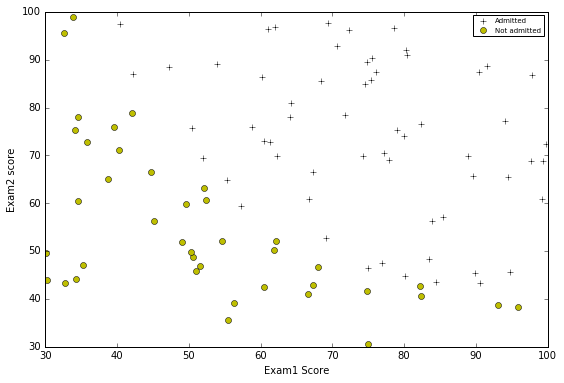

In [233]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [9, 6]
plt.plot(x1, x2, "k+", label = "Admitted")
plt.plot(x3, x4, "yo", label = "Not admitted")
plt.xlabel("Exam1 Score")
plt.ylabel("Exam2 score")
plt.legend(loc = "upper right", fontsize = "x-small", numpoints = 1 )
plt.ylim((30,100))
plt.xlim((30,100))
plt.show()

                    Figure 1: Scatter plot of training data

# 1.2 Implementation

## 1.2.1 Warmup exercise: sigmoid function

In [119]:
import numpy as np
def sigmoid(z):
    denominator = 1 + np.exp(-1 * z)
    g = 1 / denominator
    return g
    

## 1.2.2 Cost function and gradient

In [120]:
import numpy as np
[m, n] = np.shape(x)
x.insert(0, "ones", 1)
initial_theta = np.zeros((n+1, 1))


In [200]:
def cost(theta, x, y):
    m = len(y)
    temp1 = -1 * y.dot(np.log(sigmoid(x.dot(theta))))
    temp2 = (1 - y).dot(np.log(1 - sigmoid(x.dot(theta))))
    
    J = np.sum(temp1 - temp2) / (m * 1.0)
    
    return J


def gradient(theta, x, y):
    m = len(y)
    grad = x.T.dot((sigmoid(x.dot(theta))) - y) * 1.0/m
    return grad.flatten()

# 1.2.3 Learning parameters using scipy.optimize


In [217]:
import scipy.optimize as op
minimized_values = op.fmin_tnc(func = cost, x0 = initial_theta, args = (x.values, y.values), fprime = gradient)
optimal_theta = minimized_values[0]

##                                                 or

In [216]:
minimized_values1 = op.minimize(fun = cost, x0 = initial_theta, args = (x.values, y.values), method = 'TNC', jac = gradient)
optimal_theta1 = minimized_values1.x

## Decision Boundary

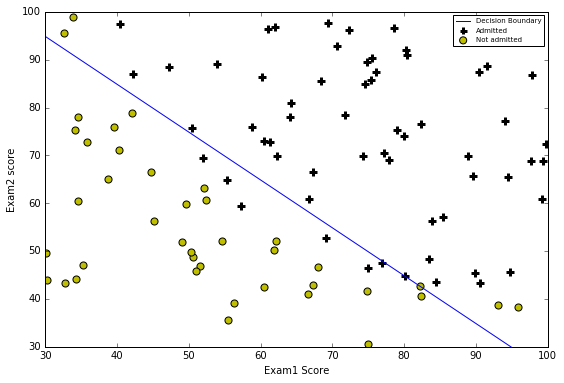

In [281]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [9, 6]
plt.scatter(x1, x2, s = 50, c = 'black', marker = "+", linewidths = 3, label = "Admitted")
plt.scatter(x3, x4, s=50, c='y', marker = "o", linewidths = 1, label = "Not admitted")

plot_x = np.linspace(min(x[1].values) - 2,  max(x[1]) + 2, 50)
plot_y = (-1./optimal_theta[2]) * (optimal_theta[2] * plot_x + optimal_theta[0])
plt.plot(plot_x, plot_y, label = "Decision Boundary")

plt.xlabel("Exam1 Score")
plt.ylabel("Exam2 score")
plt.legend(loc = "upper right", fontsize = "x-small", scatterpoints=1)
plt.ylim((30,100))
plt.xlim((30,100))
plt.show()

             Figure 2: Training data with decision boundary

# 1.2.4 Evaluating logistic regression

In [308]:
prob = sigmoid(np.array([1, 45, 85]).dot(optimal_theta))

In [294]:
def predict(theta, x):
    p = sigmoid(x.values.dot(theta))
    for i in range(len(p)):
        p[i] = round(p[i])
    return p

In [311]:
p = predict(optimal_theta, x)
count = 0
i = 0
while i < len(y):
    if y.values[i] == p[i]:
        count = count + 1
    i = i + 1
percentage = ((1.0 * count)/len(y)) * 100
print "Training Accuracy: ", percentage, "%"


Training Accuracy:  89.0 %
